In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from mylib import post_plot
import seaborn as sns

sns.set_theme()

IMG_DIR = Path("../output/imgs")
if not IMG_DIR.exists():
    IMG_DIR.mkdir()
plt.rc("figure", figsize=(30, 6))
post_params = dict(save=True, show=True, img_dir=IMG_DIR / "data-view")

In [ ]:
from mylib.new_energy_plant import DataSet

dfs = [ds.load_dataframe() for ds in DataSet]
for df in dfs:
    df.index = pd.to_datetime(df.index, unit="s")
dfs_h = [df.resample("h").mean() for df in dfs]
dfs_day = [df.resample("D").mean() for df in dfs]

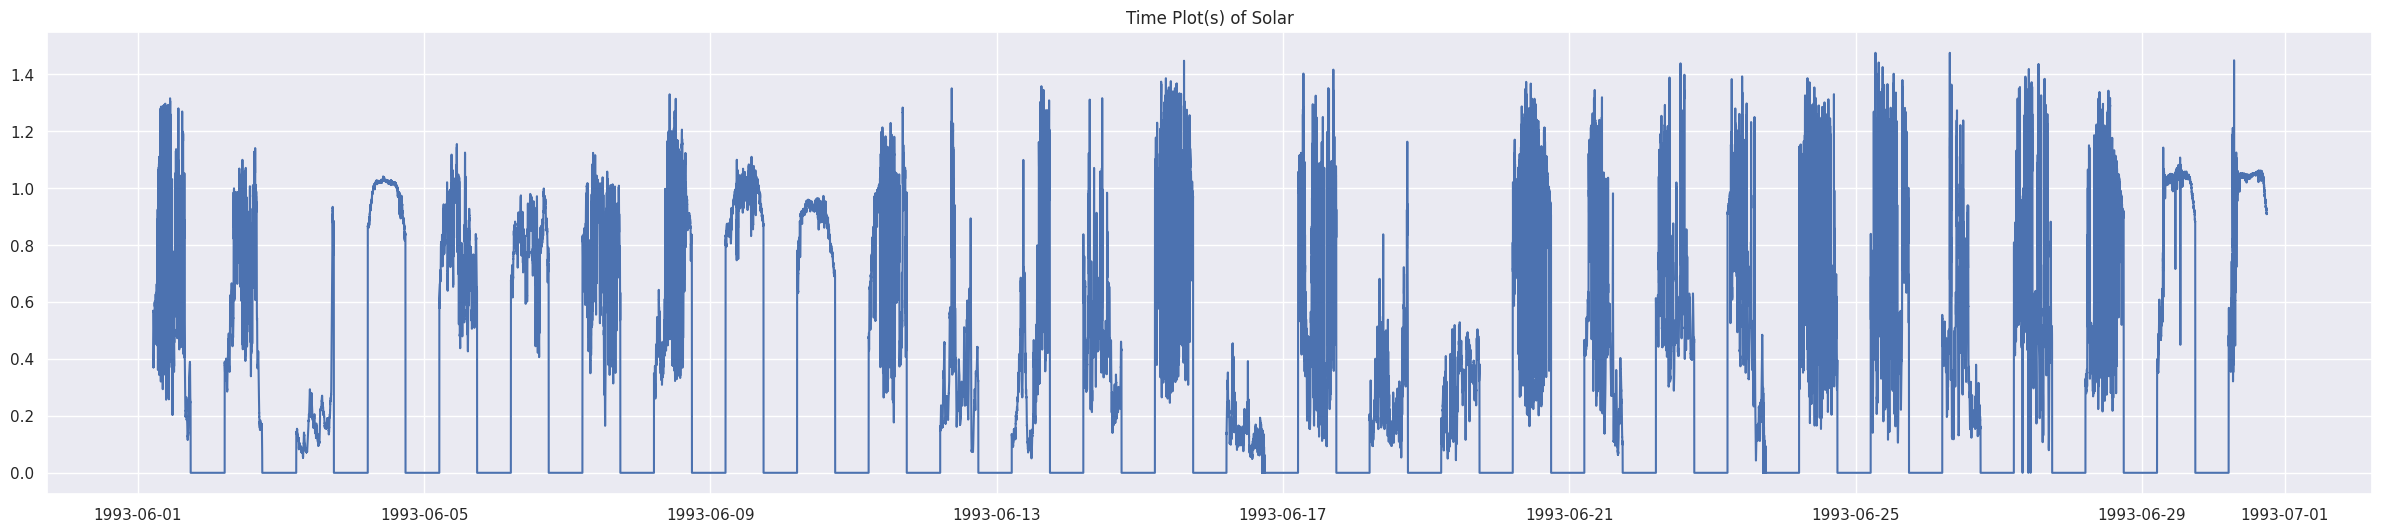

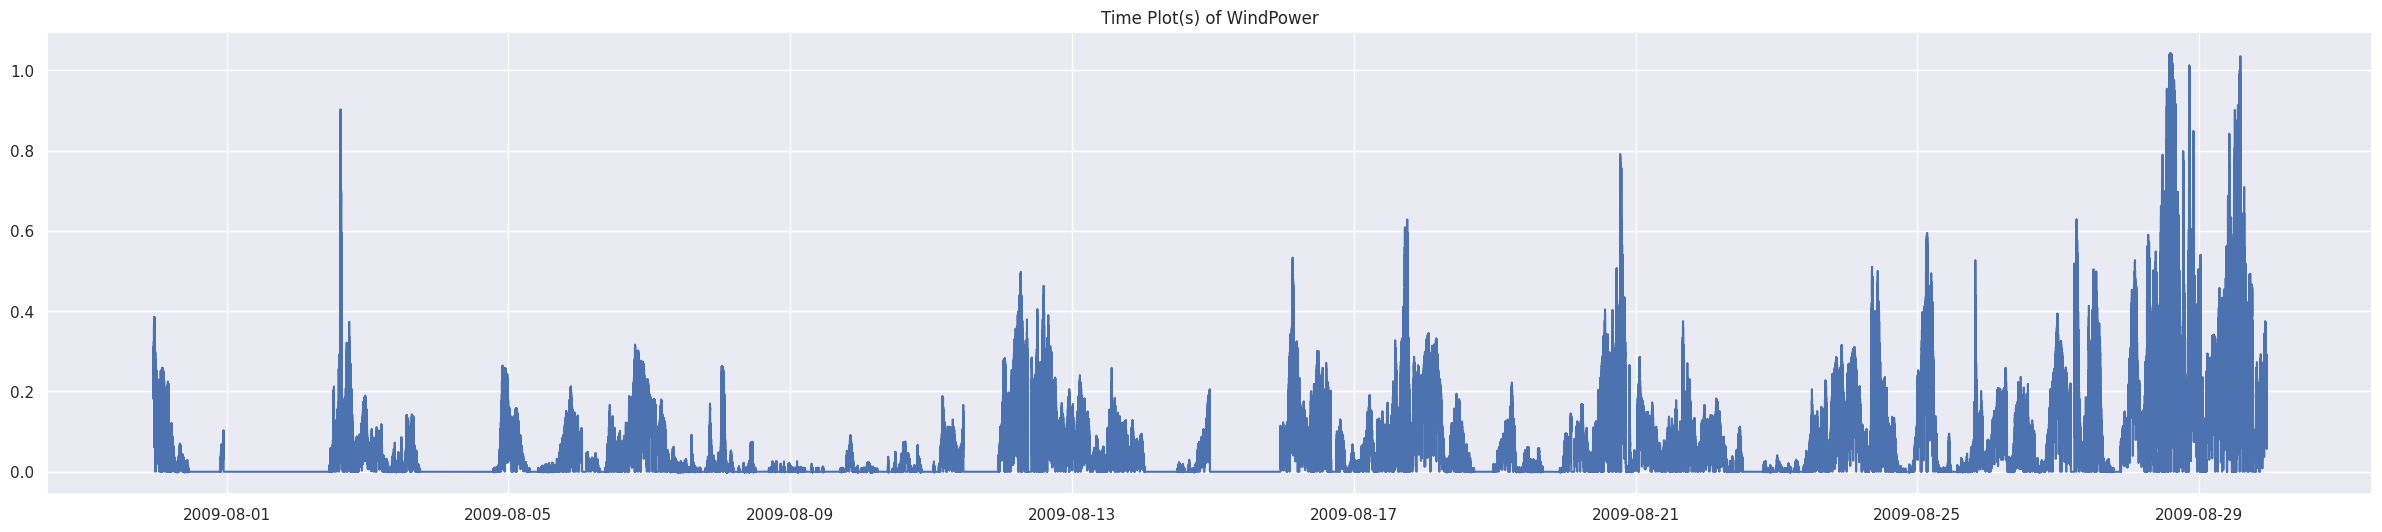

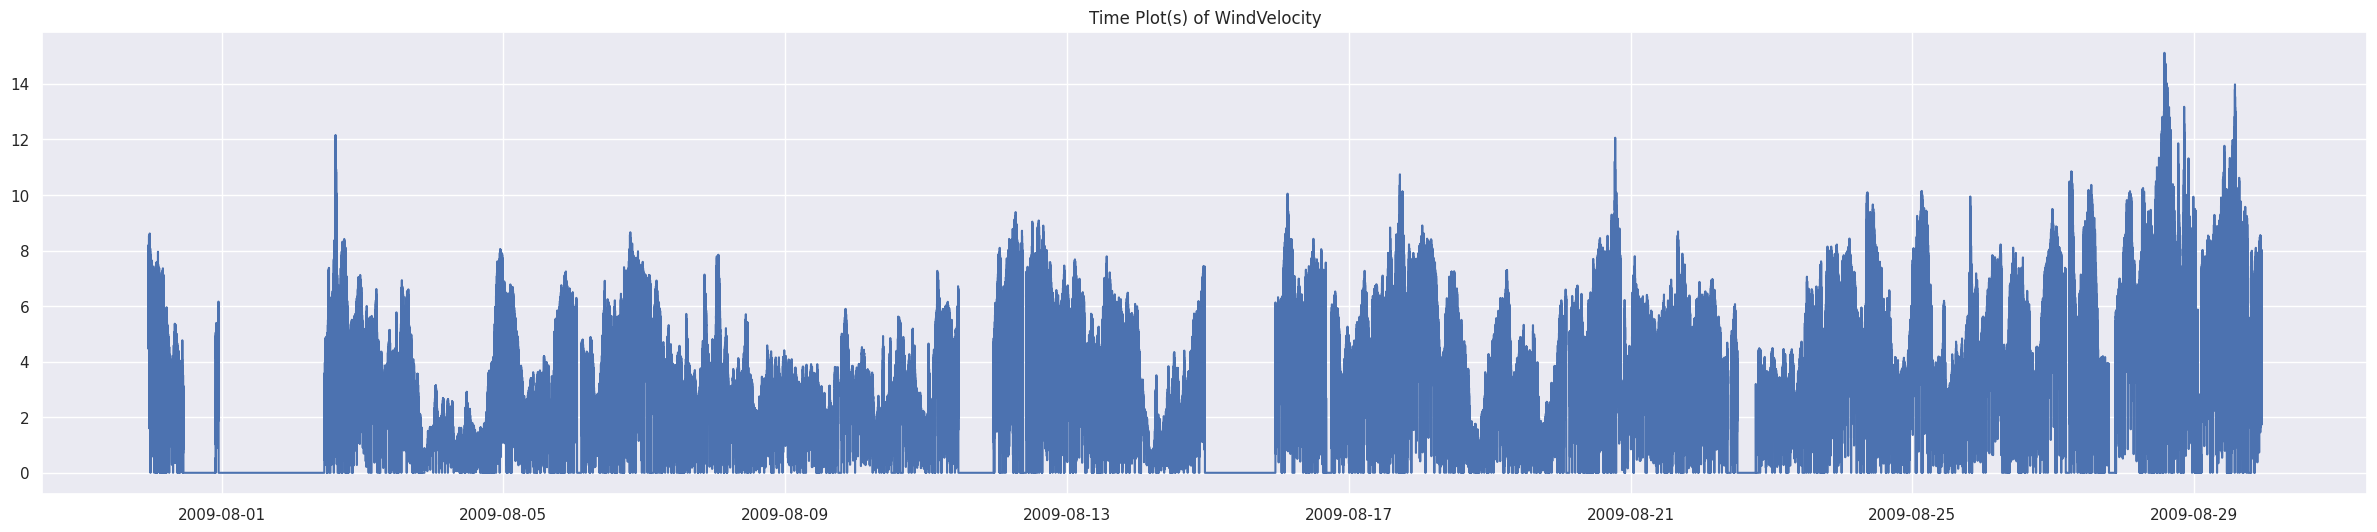

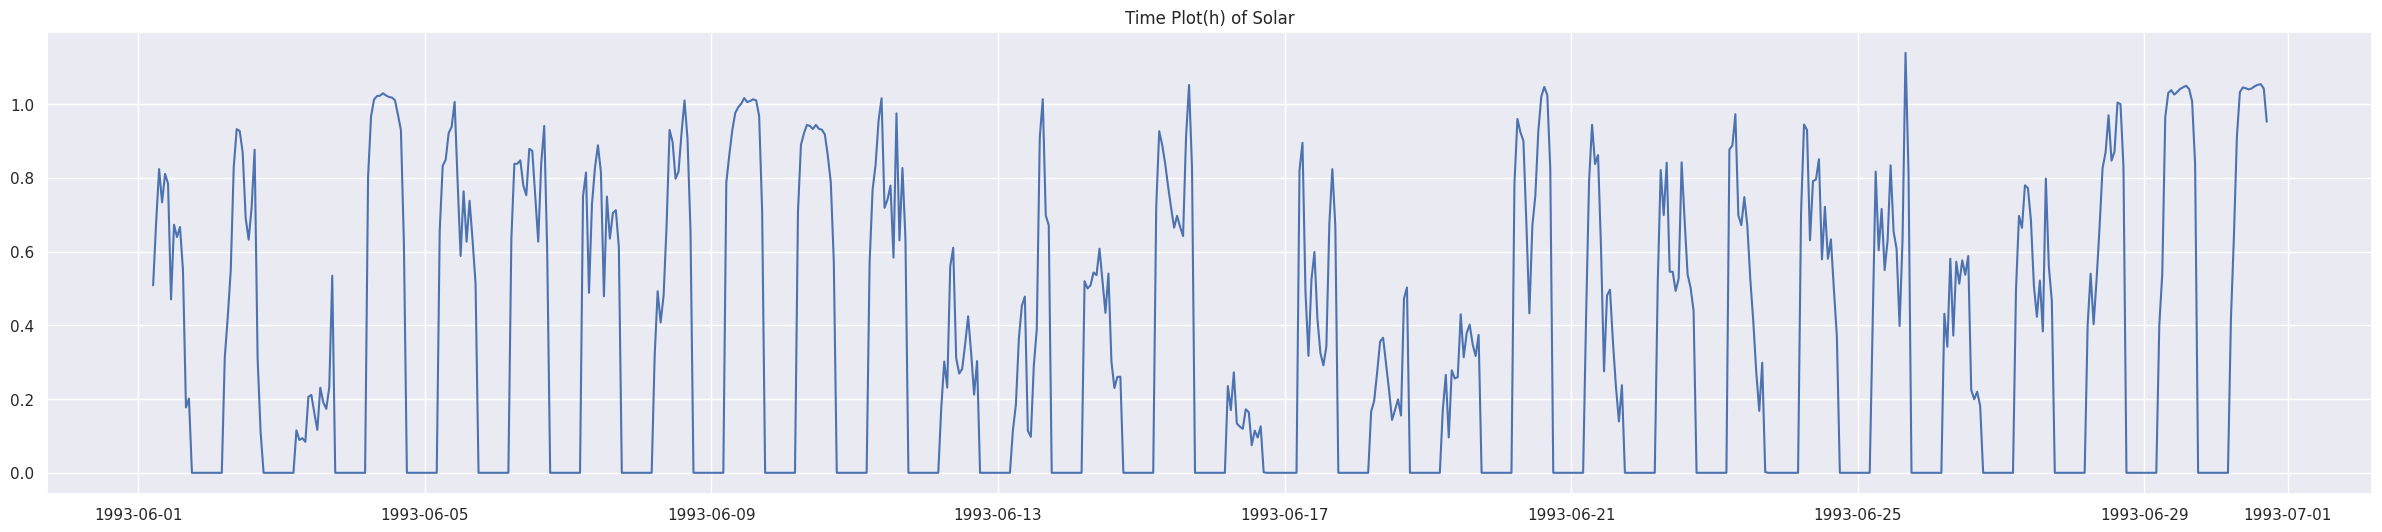

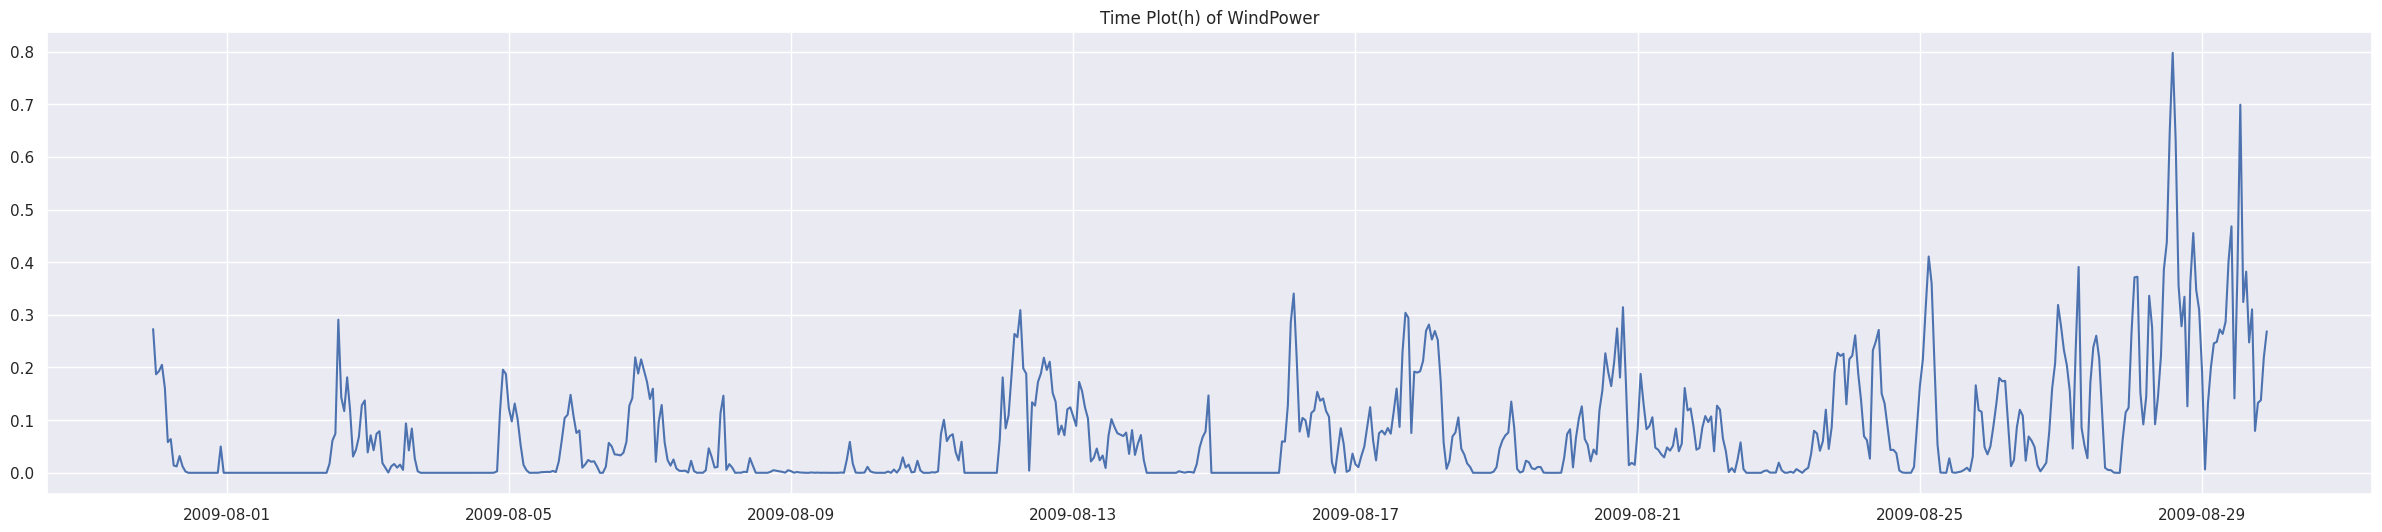

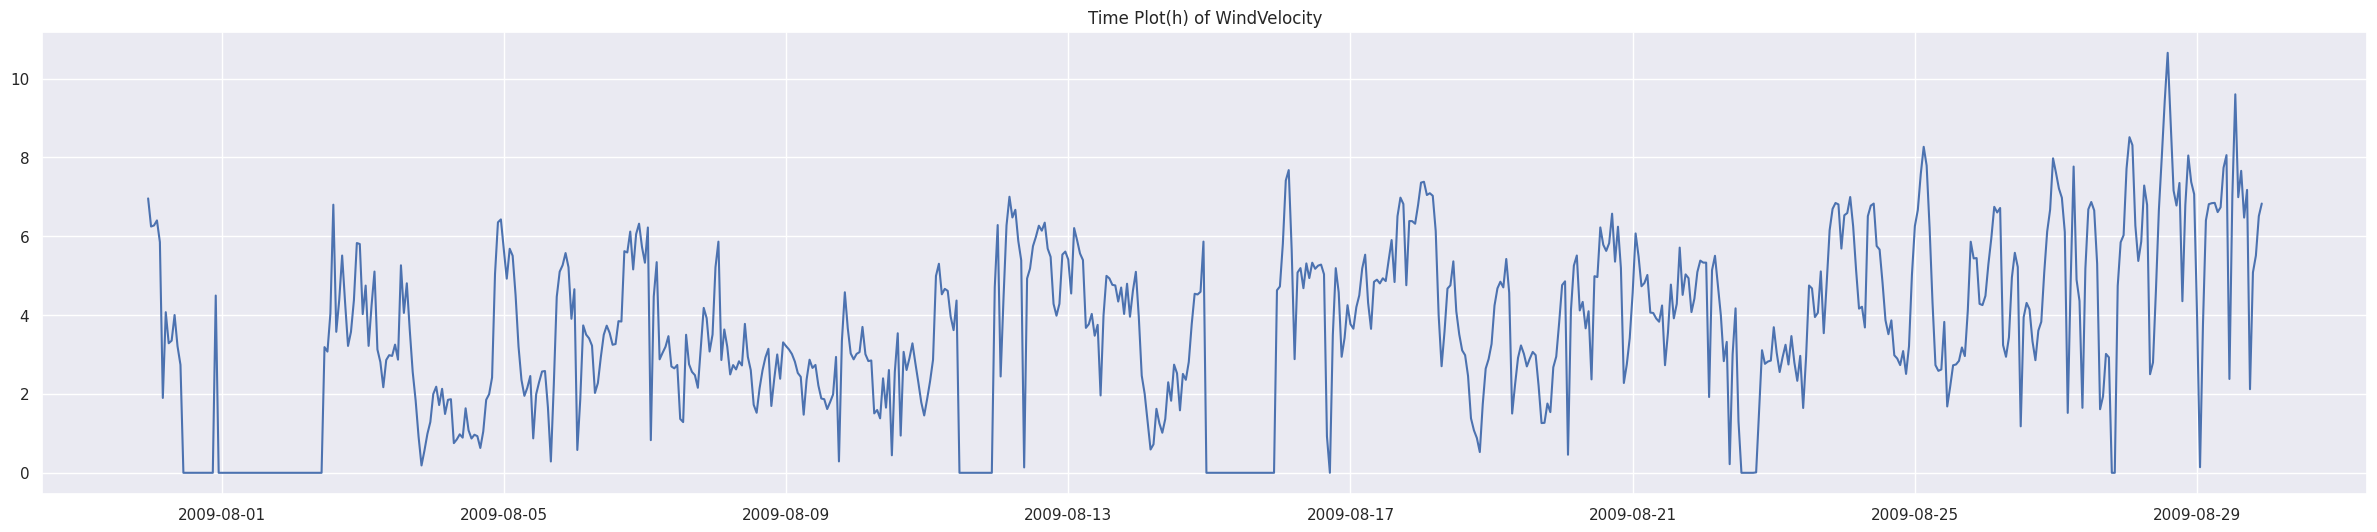

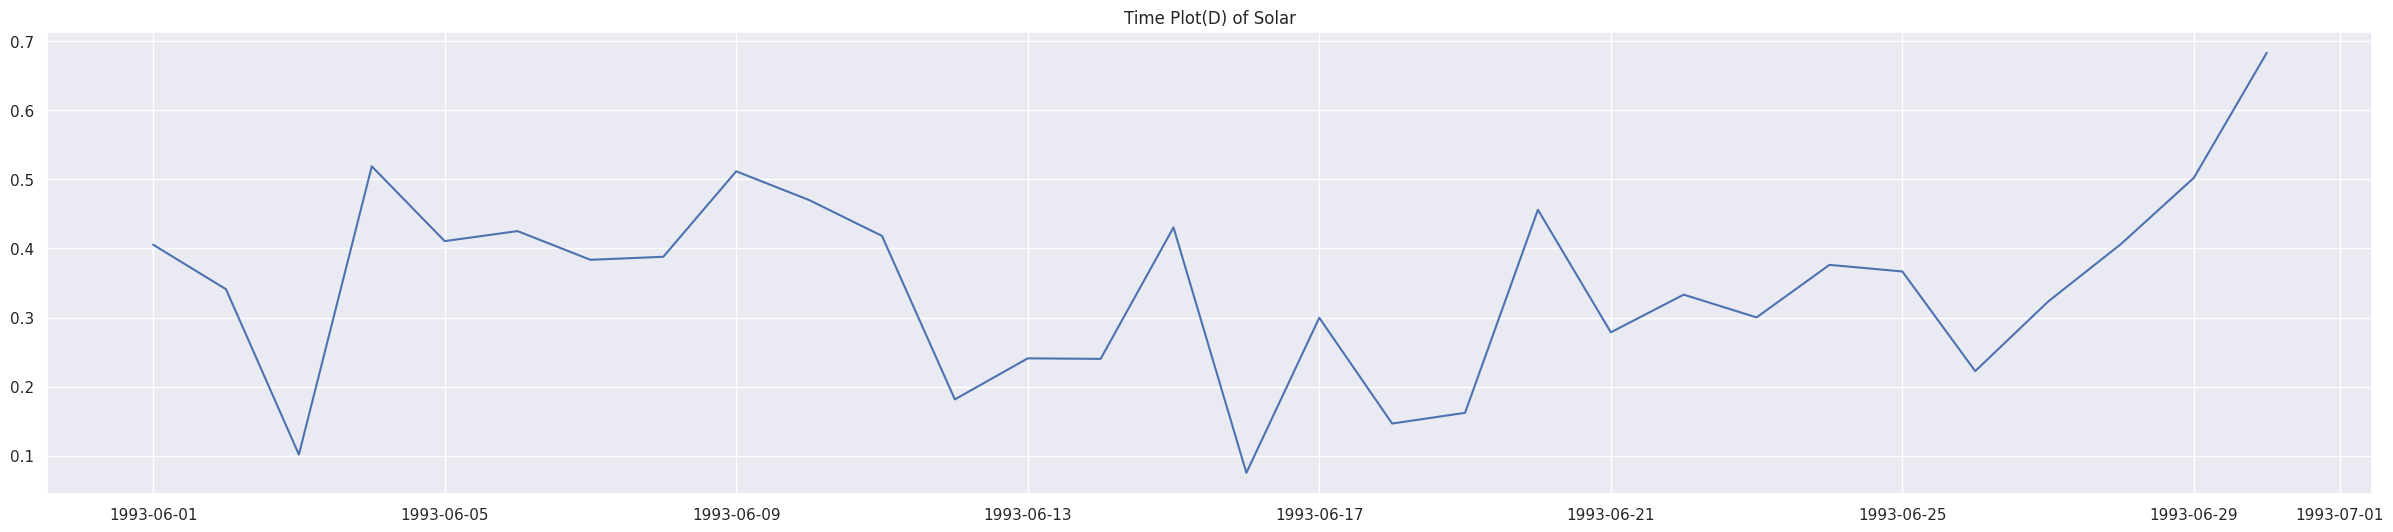

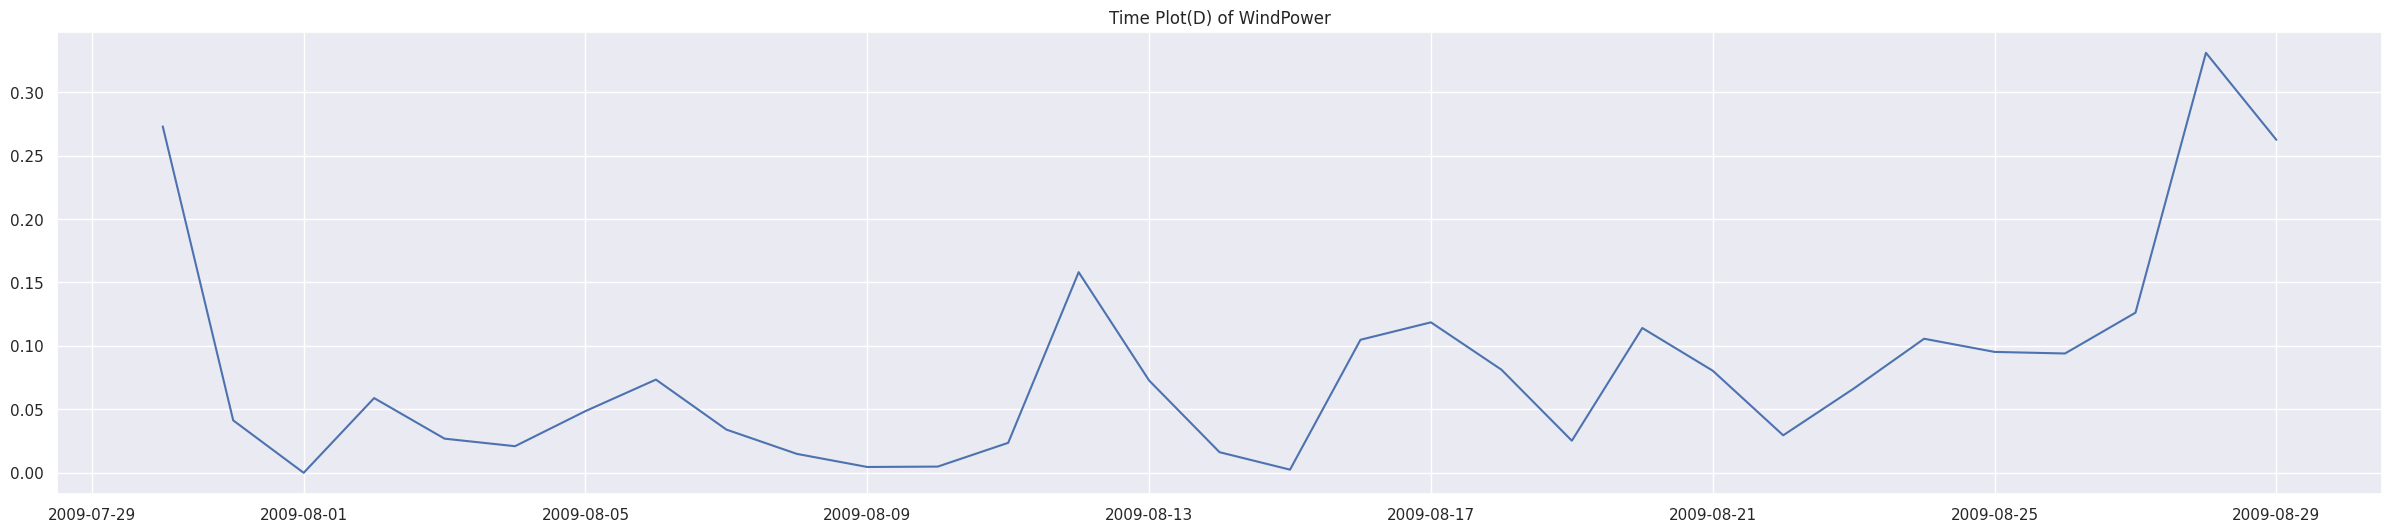

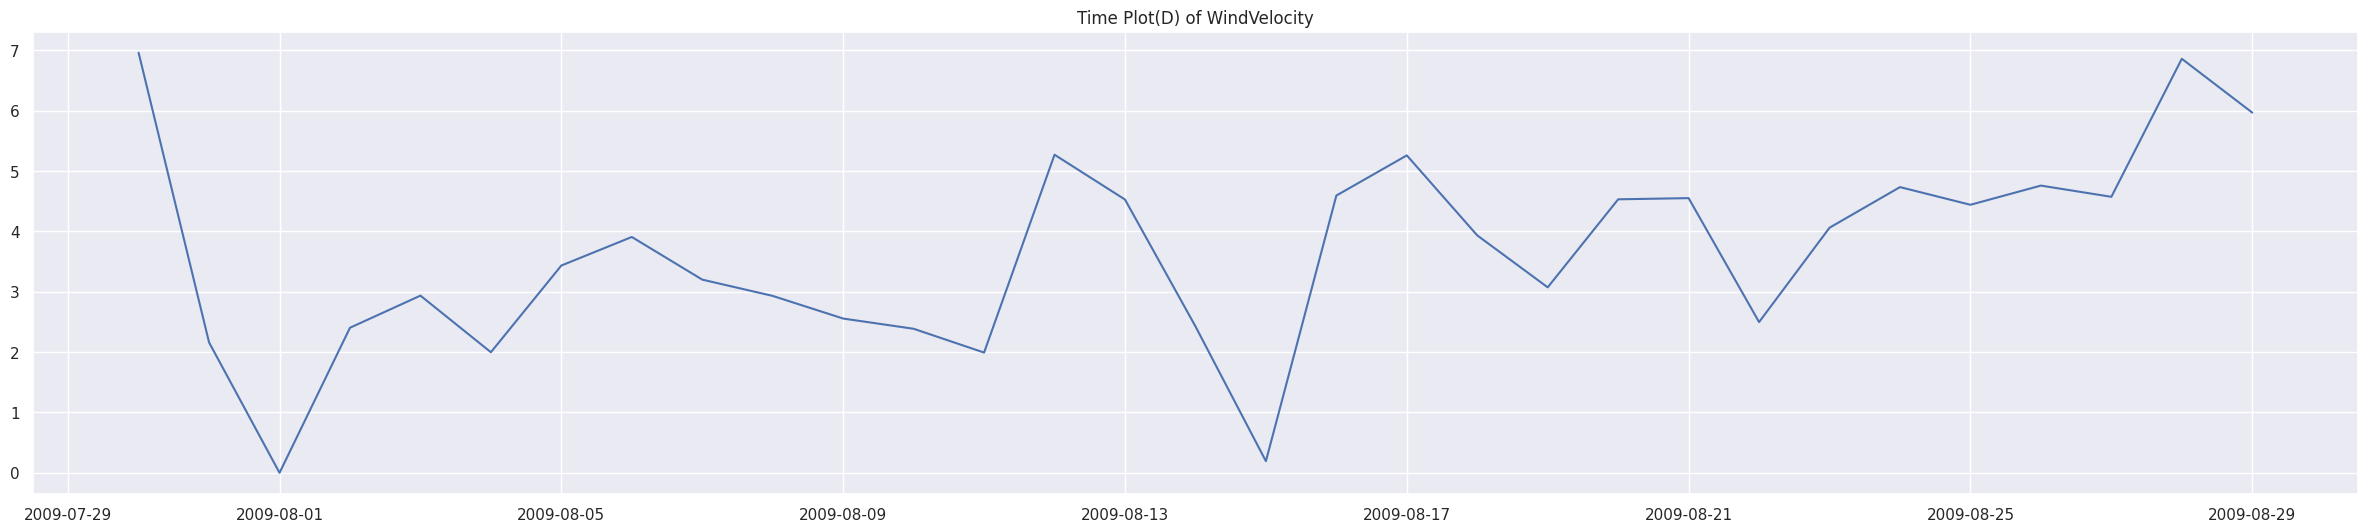

In [2]:
# 折线图
for _T, _dfs in zip(["s", "h", "D"], [dfs, dfs_h, dfs_day]):
    for ds, df in zip(DataSet, _dfs):
        plt.plot(df.loc[:, "value"])
        plt.title(f"Time Plot({_T}) of {ds.name}")
        post_plot(**post_params)

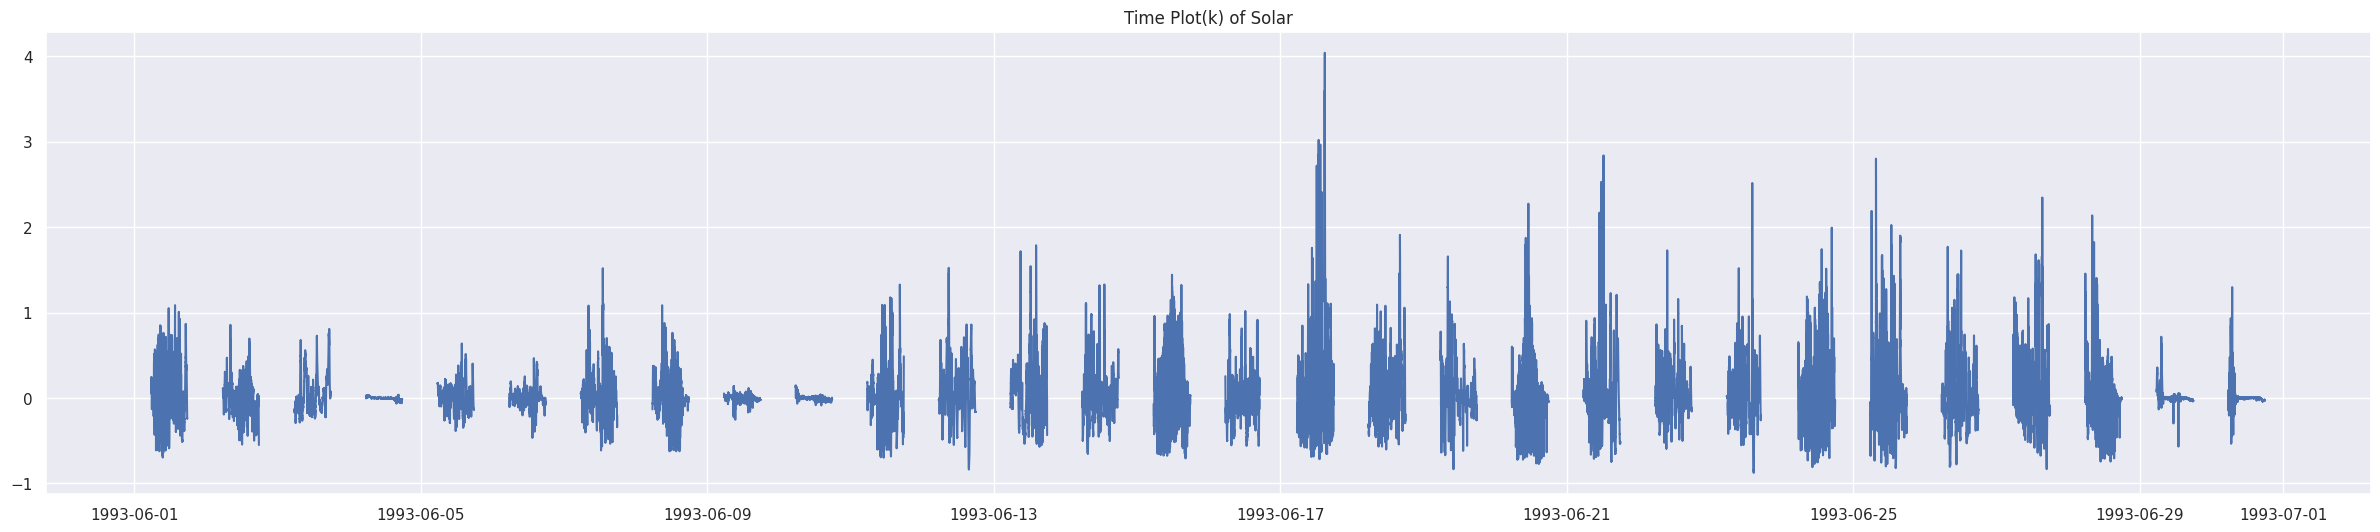

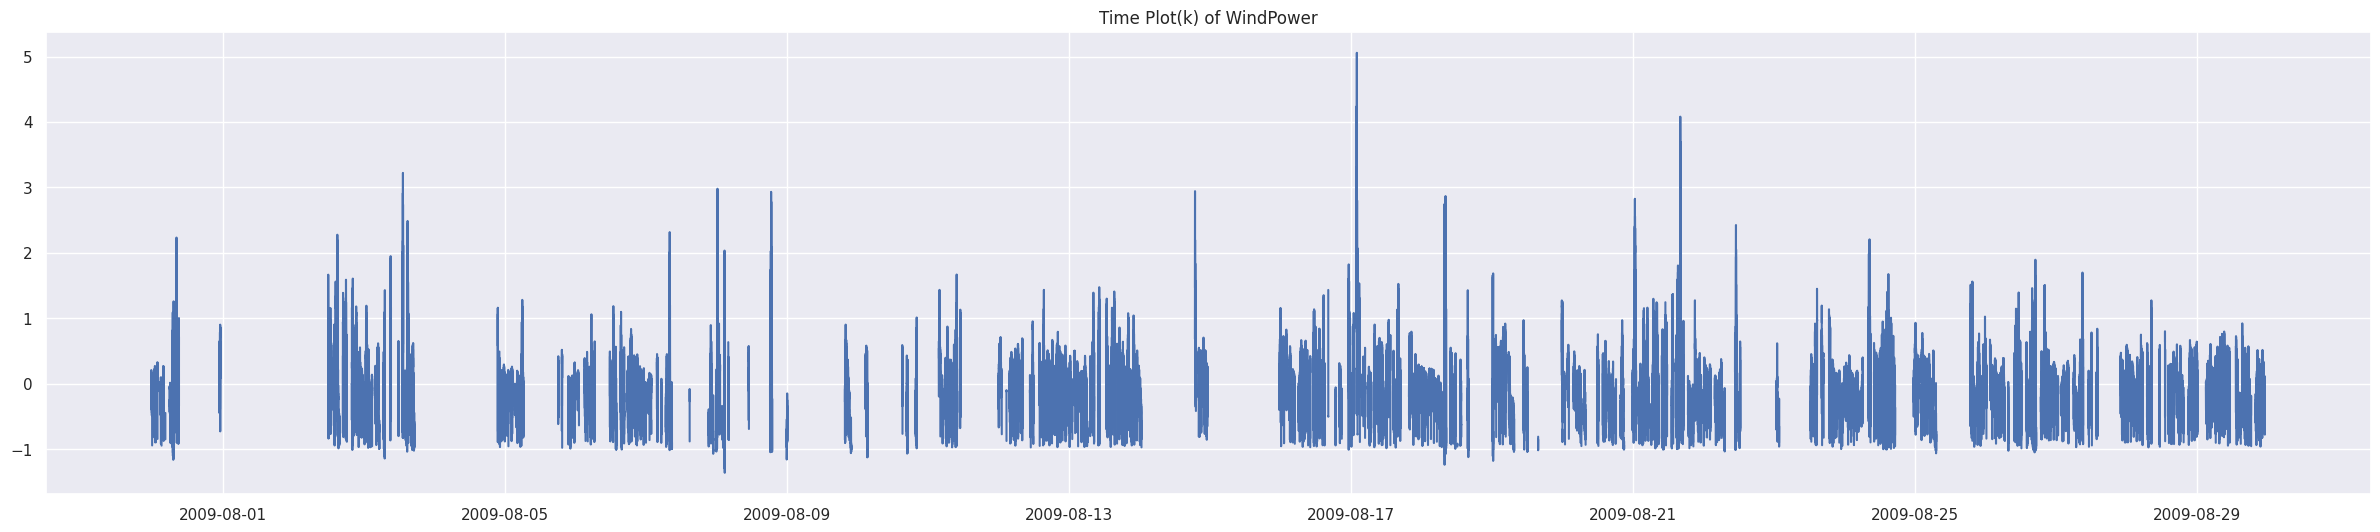

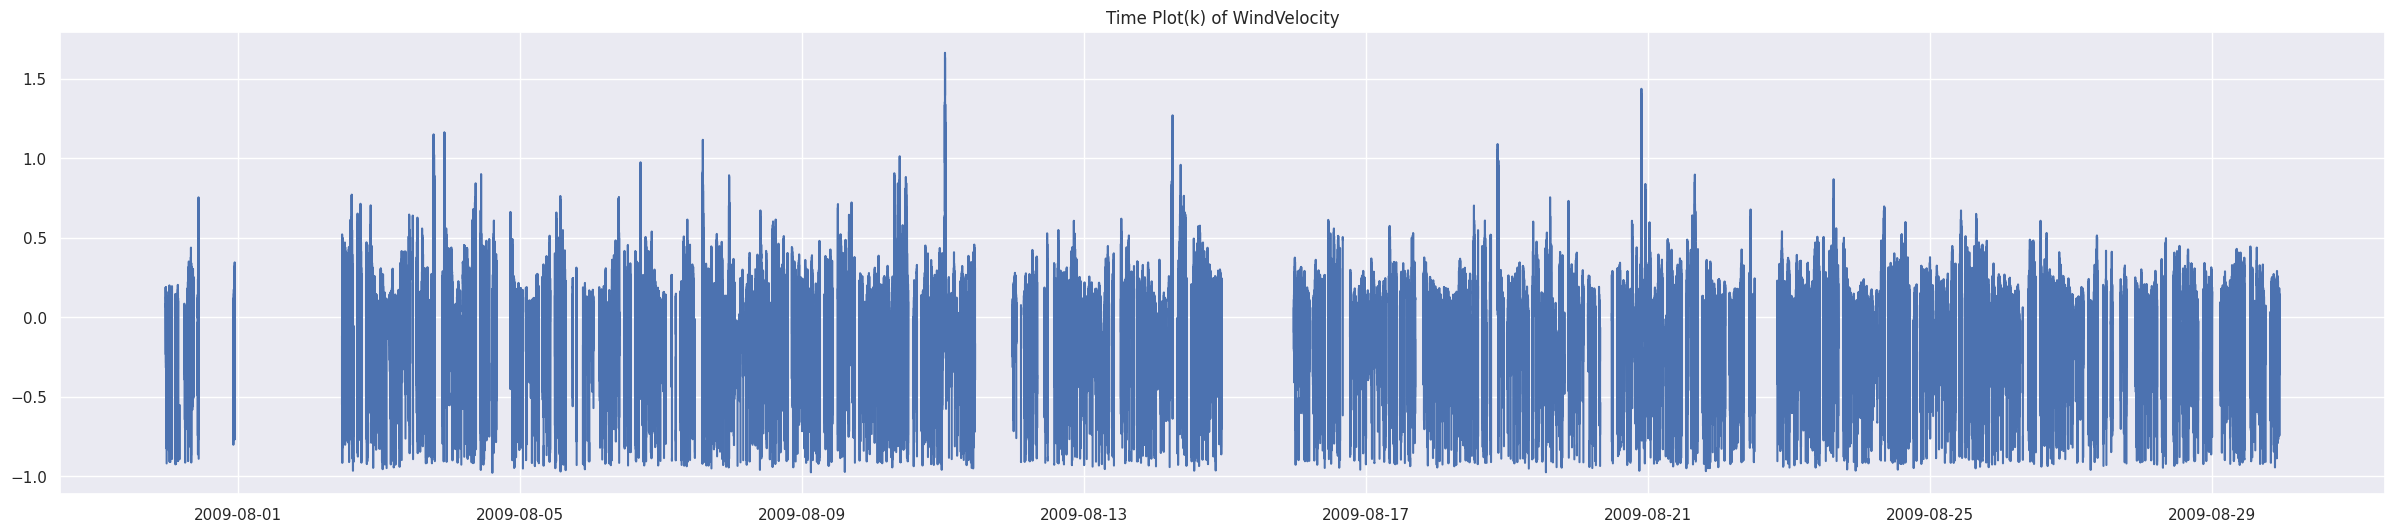

In [4]:
# 波动幅度折线图
from mylib.new_energy_plant import KTransformer

for ds, df in zip(DataSet, dfs):
    ts = df.loc[:, "value"]
    to_nan = 0  # if ds == DataSet.Solar else None
    k = KTransformer(window=30 * 60, to_nan=to_nan).transform(ts)
    plt.plot(k)
    plt.title(f"Time Plot(k) of {ds.name}")
    post_plot(**post_params)

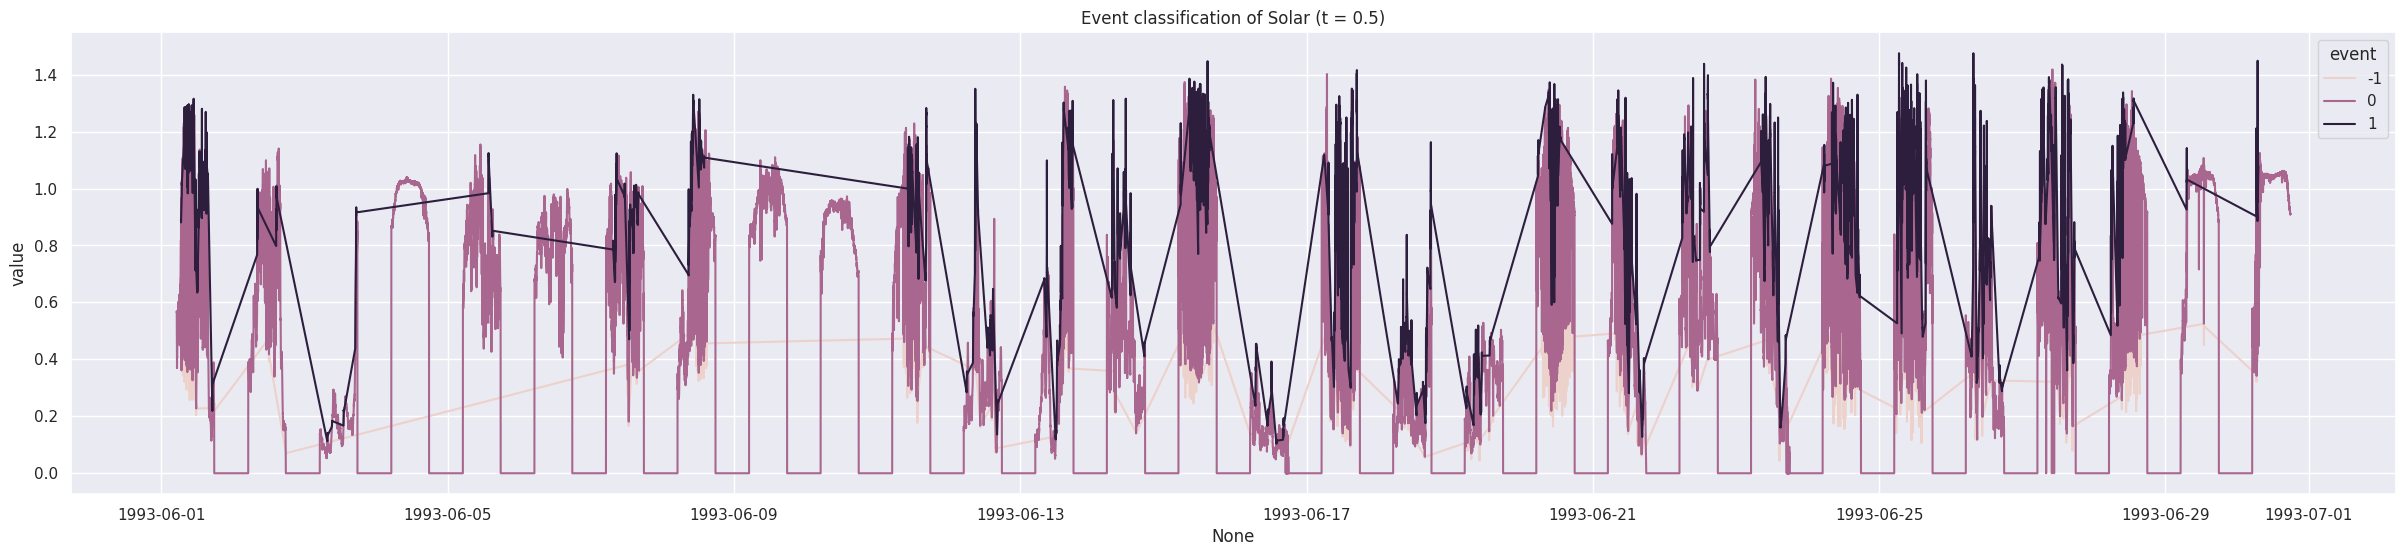

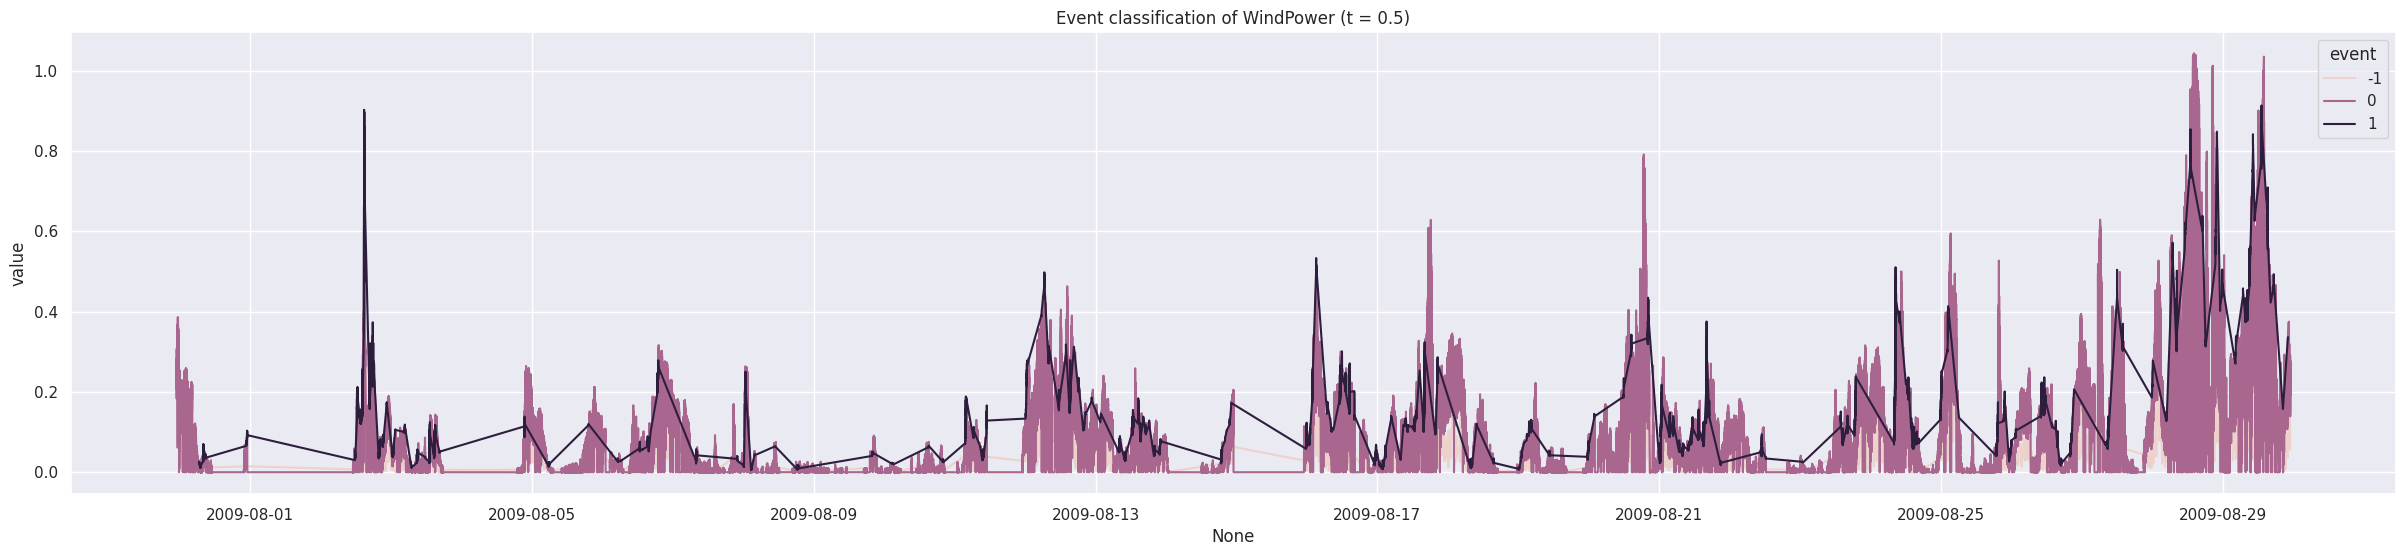

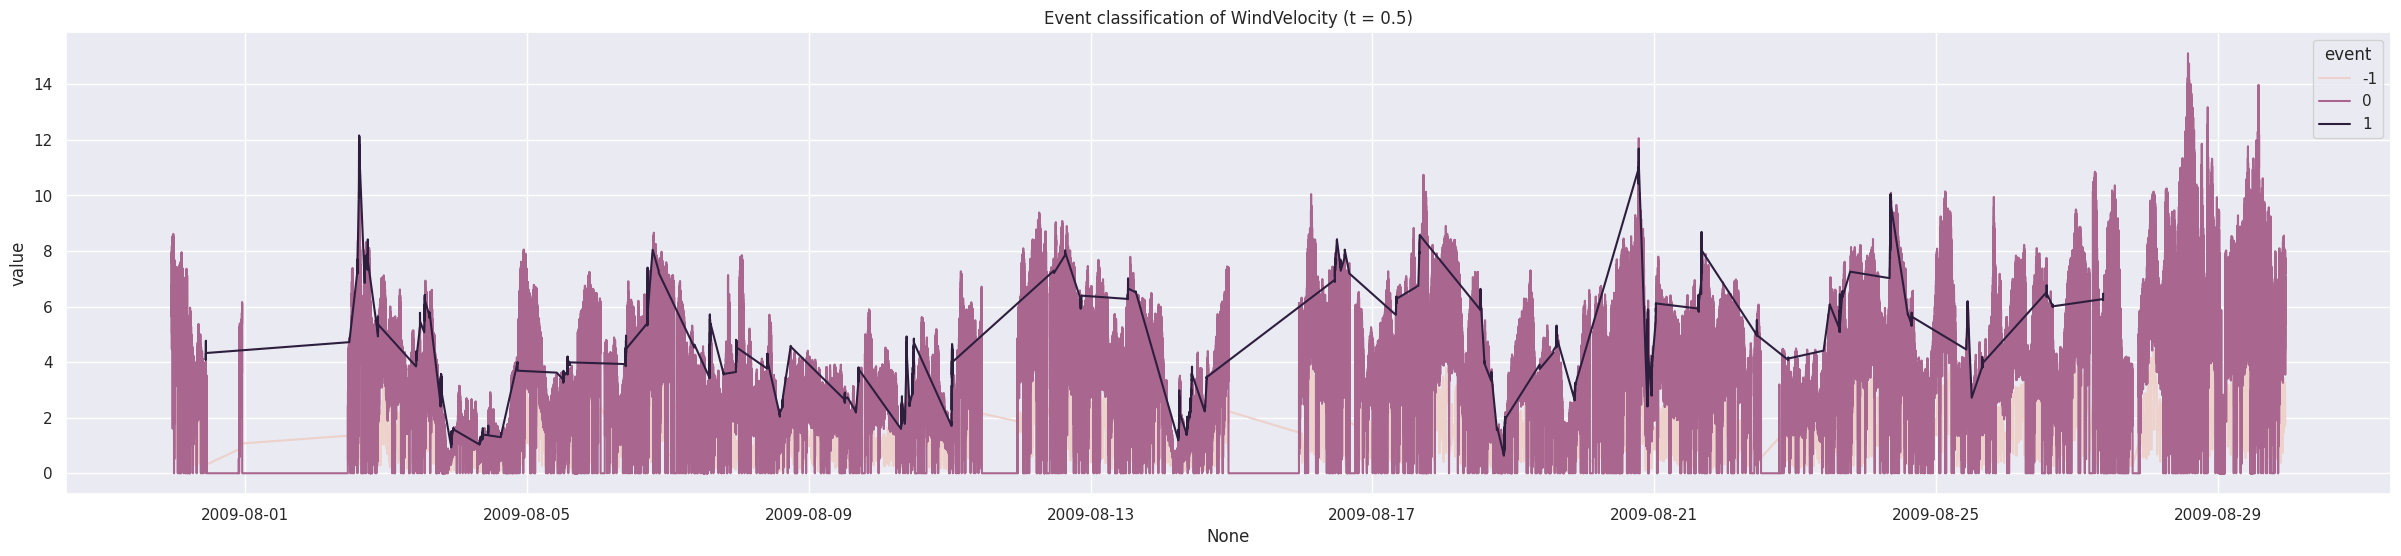

In [5]:
from mylib.new_energy_plant import EventClassifier

t = 0.5
for ds, df in zip(DataSet, dfs):
    df = df.copy()
    df["k"] = KTransformer(window=30 * 60, to_nan=to_nan).transform(df.loc[:, "value"])
    df["event"] = EventClassifier(t=t).transform(df.loc[:, "k"])
    sns.lineplot(df, x=df.index, y="value", hue="event")
    plt.title(f"Event classification of {ds.name} (t = {t})")
    post_plot(**post_params)